In [1]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-07-16 09:22:00


In [2]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

##### Read in Air Temp. & Snow Depth Datasets from from GLDAS 

### 3 hr interval Snow Depth from 2000-01-01 00:00:00 to 2021-05-17 18:00:00

In [3]:
# read in CSV file for each winter
#
snow_depth = pd.read_csv ("D:/Users/aster/Desktop/SNOW_DEPTH_2022_07_01/SnowDepth_WhiteDzud_3hr.csv")
df1 = pd.DataFrame(snow_depth)
df1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2000-01-01 00:00:00,0.020283,0.163833,0.009550,0.096350,0.059797,0.031030,0.009782,0.005413,0.008964,...,0.108549,0.075811,0.090601,0.009469,0.024535,0.020010,0.001197,0.277315,0.013051,0.060852
1,2000-01-01 03:00:00,0.020587,0.166380,0.010599,0.102729,0.059687,0.031119,0.010982,0.006481,0.011329,...,0.108284,0.086285,0.092040,0.009875,0.028300,0.019886,0.001326,0.277718,0.013982,0.061050
2,2000-01-01 06:00:00,0.020758,0.168298,0.010686,0.104631,0.059558,0.031808,0.012226,0.012007,0.011671,...,0.108130,0.087865,0.092201,0.010242,0.032270,0.019819,0.001567,0.278051,0.023664,0.060873
3,2000-01-01 09:00:00,0.020753,0.170367,0.011013,0.104701,0.059515,0.032122,0.013671,0.013168,0.011998,...,0.108207,0.087865,0.092158,0.010644,0.032287,0.019830,0.002670,0.278708,0.024279,0.060922
4,2000-01-01 12:00:00,0.020737,0.172809,0.011085,0.104693,0.059494,0.036289,0.015174,0.014477,0.012026,...,0.108260,0.087876,0.092158,0.011824,0.032314,0.019814,0.003457,0.279360,0.024738,0.060971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62458,2021-05-17 06:00:00,0.007534,0.040299,0.000177,0.003062,0.000195,0.000130,0.000000,0.000000,0.000119,...,0.057832,0.013855,0.003371,0.000000,0.000942,0.000044,0.000000,0.016939,0.000012,0.016802
62459,2021-05-17 09:00:00,0.017269,0.038307,0.000541,0.014380,0.000000,0.000058,0.000000,0.000000,0.000899,...,0.064206,0.040386,0.002866,0.000000,0.000808,0.000009,0.000000,0.014812,0.000000,0.023617
62460,2021-05-17 12:00:00,0.026892,0.037231,0.001034,0.031798,0.000038,0.000045,0.000000,0.000040,0.000511,...,0.069382,0.065363,0.004733,0.000000,0.010807,0.020670,0.000000,0.012470,0.006496,0.024374
62461,2021-05-17 15:00:00,0.030476,0.037139,0.001075,0.033557,0.000043,0.000045,0.000000,0.001244,0.000487,...,0.070322,0.064970,0.005639,0.000000,0.027397,0.040836,0.000000,0.012469,0.010414,0.024310


In [4]:
df1.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [5]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'])

In [6]:
df1.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [7]:
#Set DateTime as index
#
df1= df1.set_index('DateTime')
df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,0.020283,0.163833,0.009550,0.096350,0.059797,0.031030,0.009782,0.005413,0.008964,0.014887,...,0.108549,0.075811,0.090601,0.009469,0.024535,0.020010,0.001197,0.277315,0.013051,0.060852
2000-01-01 03:00:00,0.020587,0.166380,0.010599,0.102729,0.059687,0.031119,0.010982,0.006481,0.011329,0.015827,...,0.108284,0.086285,0.092040,0.009875,0.028300,0.019886,0.001326,0.277718,0.013982,0.061050
2000-01-01 06:00:00,0.020758,0.168298,0.010686,0.104631,0.059558,0.031808,0.012226,0.012007,0.011671,0.016777,...,0.108130,0.087865,0.092201,0.010242,0.032270,0.019819,0.001567,0.278051,0.023664,0.060873
2000-01-01 09:00:00,0.020753,0.170367,0.011013,0.104701,0.059515,0.032122,0.013671,0.013168,0.011998,0.017821,...,0.108207,0.087865,0.092158,0.010644,0.032287,0.019830,0.002670,0.278708,0.024279,0.060922
2000-01-01 12:00:00,0.020737,0.172809,0.011085,0.104693,0.059494,0.036289,0.015174,0.014477,0.012026,0.018887,...,0.108260,0.087876,0.092158,0.011824,0.032314,0.019814,0.003457,0.279360,0.024738,0.060971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17 06:00:00,0.007534,0.040299,0.000177,0.003062,0.000195,0.000130,0.000000,0.000000,0.000119,0.000000,...,0.057832,0.013855,0.003371,0.000000,0.000942,0.000044,0.000000,0.016939,0.000012,0.016802
2021-05-17 09:00:00,0.017269,0.038307,0.000541,0.014380,0.000000,0.000058,0.000000,0.000000,0.000899,0.000000,...,0.064206,0.040386,0.002866,0.000000,0.000808,0.000009,0.000000,0.014812,0.000000,0.023617
2021-05-17 12:00:00,0.026892,0.037231,0.001034,0.031798,0.000038,0.000045,0.000000,0.000040,0.000511,0.000000,...,0.069382,0.065363,0.004733,0.000000,0.010807,0.020670,0.000000,0.012470,0.006496,0.024374


In [8]:
#Daily mean
day_mean_df1= df1.resample('D').mean()
day_mean_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.020611,0.171343,0.010776,0.103279,0.062720,0.040069,1.397477e-02,0.012570,0.011133,0.016864,...,0.108926,0.088989,0.094492,0.012897,0.030600,0.019488,0.003628,0.266873,0.021924,0.060321
2000-01-02,0.030727,0.191508,0.028223,0.109523,0.084351,0.055303,1.732546e-02,0.023521,0.014121,0.009654,...,0.121186,0.115994,0.112353,0.025288,0.032705,0.016872,0.029170,0.200500,0.045558,0.066114
2000-01-03,0.045717,0.193032,0.043282,0.113867,0.083901,0.054838,2.394886e-02,0.029742,0.022189,0.013129,...,0.133872,0.119640,0.112032,0.026326,0.034977,0.017046,0.036531,0.202629,0.056343,0.071932
2000-01-04,0.045875,0.192110,0.047988,0.113236,0.083278,0.054102,2.624052e-02,0.031184,0.037933,0.015300,...,0.139565,0.118564,0.111525,0.026049,0.035337,0.017188,0.033163,0.201805,0.054347,0.071808
2000-01-05,0.045762,0.194991,0.168559,0.112225,0.082492,0.057085,2.549751e-02,0.032030,0.385476,0.015166,...,0.139371,0.117462,0.110785,0.025639,0.034959,0.017028,0.034300,0.201263,0.053271,0.073808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.021697,0.079608,0.003475,0.002255,0.000890,0.012453,6.294804e-08,0.000000,0.000184,0.000000,...,0.104556,0.001353,0.007702,0.000159,0.002725,0.000811,0.000000,0.066373,0.000482,0.045371
2021-05-14,0.015018,0.052796,0.002287,0.001619,0.000629,0.006546,0.000000e+00,0.000000,0.000025,0.000000,...,0.080753,0.000503,0.005938,0.000091,0.002146,0.000696,0.000000,0.045373,0.000236,0.027185
2021-05-15,0.007749,0.035828,0.001027,0.000629,0.000233,0.001597,0.000000e+00,0.000000,0.000000,0.000000,...,0.054354,0.000074,0.002749,0.000002,0.001073,0.000294,0.000000,0.029511,0.000036,0.012560


In [9]:
#Divide into 'winters' e.g. August 2020-May 2021
#
day_mean_W00_01_df1 = day_mean_df1.loc['08-2020' : '05-2021']
day_mean_W00_01_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.020400,0.039785,0.005855,0.023436,0.004432,0.000003,1.056540e-07,1.896623e-05,0.002437,0.000010,...,0.052573,0.026480,0.009115,4.853183e-07,0.005087,0.014817,0.000009,0.004493,0.001314,0.024795
2020-08-02,0.015116,0.035200,0.004667,0.011876,0.002692,0.000031,1.142939e-06,4.463066e-05,0.000851,0.000112,...,0.040761,0.011540,0.006272,1.156986e-05,0.004105,0.009566,0.000001,0.003335,0.000894,0.018776
2020-08-03,0.013614,0.028576,0.003379,0.005391,0.001388,0.000017,0.000000e+00,7.990504e-07,0.000222,0.000000,...,0.031445,0.004435,0.003766,0.000000e+00,0.002011,0.003911,0.000000,0.002952,0.000463,0.015430
2020-08-04,0.012335,0.018622,0.002926,0.002719,0.000883,0.000141,2.641349e-08,2.042138e-06,0.000013,0.000002,...,0.021139,0.002035,0.002663,0.000000e+00,0.001192,0.001681,0.000000,0.001291,0.000507,0.009309
2020-08-05,0.005115,0.011629,0.001164,0.001447,0.001409,0.000137,6.744080e-07,1.337903e-05,0.000000,0.000054,...,0.014074,0.001210,0.003109,1.970199e-07,0.001523,0.002159,0.000000,0.000348,0.000096,0.002955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.021697,0.079608,0.003475,0.002255,0.000890,0.012453,6.294804e-08,0.000000e+00,0.000184,0.000000,...,0.104556,0.001353,0.007702,1.588977e-04,0.002725,0.000811,0.000000,0.066373,0.000482,0.045371
2021-05-14,0.015018,0.052796,0.002287,0.001619,0.000629,0.006546,0.000000e+00,0.000000e+00,0.000025,0.000000,...,0.080753,0.000503,0.005938,9.111353e-05,0.002146,0.000696,0.000000,0.045373,0.000236,0.027185
2021-05-15,0.007749,0.035828,0.001027,0.000629,0.000233,0.001597,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.054354,0.000074,0.002749,2.182325e-06,0.001073,0.000294,0.000000,0.029511,0.000036,0.012560


In [10]:
# Select provinces that had cold snaps
#
provinces_cold_snaps = day_mean_W00_01_df1.iloc[:, [6,9,13,15,21]]
provinces_cold_snaps

,Dornogovi,Govisumber,Orkhon,Sukhbaatar,Zavkhan
DateTime,,,,,
2020-08-01,1.056540e-07,0.000010,0.026480,4.853183e-07,0.024795
2020-08-02,1.142939e-06,0.000112,0.011540,1.156986e-05,0.018776
2020-08-03,0.000000e+00,0.000000,0.004435,0.000000e+00,0.015430
2020-08-04,2.641349e-08,0.000002,0.002035,0.000000e+00,0.009309
2020-08-05,6.744080e-07,0.000054,0.001210,1.970199e-07,0.002955
...,...,...,...,...,...
2021-05-13,6.294804e-08,0.000000,0.001353,1.588977e-04,0.045371
2021-05-14,0.000000e+00,0.000000,0.000503,9.111353e-05,0.027185
2021-05-15,0.000000e+00,0.000000,0.000074,2.182325e-06,0.012560


In [11]:
run_mean_28_df1 = day_mean_W00_01_df1.rolling(28, center=True).mean()
run_mean_28_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'28-day running mean Snow Depth [m]'}, xlabel='DateTime'>

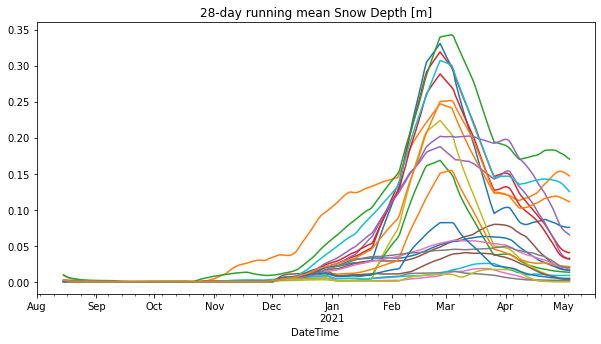

In [12]:
run_mean_28_df1.plot(legend=False, title='28-day running mean Snow Depth [m]', figsize= (10, 5))

In [13]:
run_mean_28_provinces_cold_snaps = provinces_cold_snaps.rolling(28, center=True).mean()
run_mean_28_provinces_cold_snaps

,Dornogovi,Govisumber,Orkhon,Sukhbaatar,Zavkhan
DateTime,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-13,NaN,NaN,NaN,NaN,NaN
2021-05-14,NaN,NaN,NaN,NaN,NaN
2021-05-15,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'28-day running mean AOIs Snow Depth [m]'}, xlabel='DateTime'>

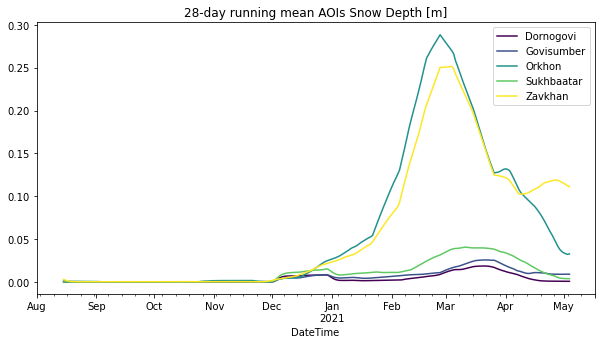

In [14]:
run_mean_28_provinces_cold_snaps.plot(legend=True, title='28-day running mean AOIs Snow Depth [m]', figsize= (10, 5), cmap='viridis')

In [15]:
run_mean_28_provinces_cold_snaps.to_csv('run_mean_28_provinces_cold_snaps_SD_W2020-2021.csv')
print('new csv file was created... ')

new csv file was created... 


---

## Daily Mean Air Temperature from 2000-01-01 to 2021-11-13 in °C

In [16]:
# read in CSV file for each winter
#
air_temp = pd.read_csv ("C:/Users/aster/OneDrive/Desktop/Air_Temperature/AirTemp_ColdDzud_C_DailyMean.csv")
df2 = pd.DataFrame(air_temp)
df2

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/aster/OneDrive/Desktop/Air_Temperature/AirTemp_ColdDzud_C_DailyMean.csv'

In [ ]:
df2.dtypes

In [ ]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

In [ ]:
df2.dtypes

In [ ]:
#Set DateTime as index
#
df2= df2.set_index('DateTime')
df2

In [ ]:
#Divide into 'winters' e.g. Jul 2019-Jun 2020
#
day_mean_W00_01_df2 = df2.loc['08-2020' : '05-2021']
day_mean_W00_01_df2

In [ ]:
# Select provinces that had cold snaps
#
provinces_cold_snaps_T = day_mean_W00_01_df2.iloc[:, [6,9,13,15,21]]
provinces_cold_snaps_T

In [ ]:
run_mean_28_df2 = day_mean_W00_01_df2.rolling(28, center=True).mean()
run_mean_28_df2

In [ ]:
run_mean_28_df2.plot(legend=False, title='28-day running mean Air Temp. [°C]', figsize= (12, 6))

In [ ]:
run_mean_28_provinces_cold_snaps_T = provinces_cold_snaps_T.rolling(28, center=True).mean()
run_mean_28_provinces_cold_snaps_T

In [ ]:
run_mean_28_provinces_cold_snaps_T.plot(legend=True, title='28-day running mean Air Temp. [°C]', figsize= (12, 6), cmap='viridis')

##### Combine mean and 28-running mean for SD & AT

In [ ]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker='o', markersize=0.5)
ax.plot(run_mean_28_df1, label='Snow Depth 28-day running mean', color='orange', linewidth=0.5)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add ais temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='steelblue', linewidth=0.1, marker='o', markersize=0.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.20)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. August 2020-May 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

##### Combine mean and 28-running mean for SD & AT for AOIs cold snaps

In [ ]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(provinces_cold_snaps, label='Snow Depth', marker='o', linewidth=0.1, markersize=0.8, color='red')
ax.plot(run_mean_28_provinces_cold_snaps, label='Snow Depth 28-day running mean', color='orange', linewidth=0.8)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add axis temp to plot
ax2.plot(provinces_cold_snaps_T, label='Air Temp', linewidth=0.1, marker='o', markersize=0.8, color='blue')
ax2.plot(run_mean_28_provinces_cold_snaps_T, label='Air Temp 28-day running mean', color='steelblue', linewidth=0.8)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. August 2020-May 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

### Find cold snaps = air temp. difference of at least 5 degrees between the daily mean and the 28-day running mean for at least 5 consecutive days.

##### Part I: Difference of at least 5 °C from 2020-08-01 to 2021-05-31

In [ ]:
diff_day_running_AT = day_mean_W00_01_df2.abs() - run_mean_28_df2.abs()
diff_day_running_AT.head(80)

In [ ]:
diff_day_running_AT.tail(80)

In [ ]:
five_degrees = diff_day_running_AT[diff_day_running_AT >= 5]
five_degrees

In [ ]:
#Drop rows which contain NaN 

five_degrees = five_degrees.dropna(axis=0, how='all')
five_degrees

In [ ]:
five_degrees.head(50)

In [ ]:
#save result table as CSV 
#Change name to period of interest
five_degrees.to_csv('five_degrees_W20-21.csv')
print('new csv file from list was created... ')

---

##### Part II: For at least 5 consecutive days from 2020-08-17 to 2021-05-18

In [ ]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

In [ ]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

In [ ]:
#read in five_degrees_W20-21.csv
#
cold_days_user = pd.read_csv('five_degrees_W20-21.csv')
df = pd.DataFrame(cold_days_user)
df

In [ ]:
#Turn to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.dtypes

#### Make a Day column to find x consecutive days

In [ ]:
df['Day'] = df['DateTime'].dt.day
df

In [ ]:
df.head(90)

---

In [ ]:
df.info()

##### Automate the following code to run in a loop for each province:

In [ ]:
# Import dependences
#
from itertools import groupby
from operator import itemgetter

# Subset province and days columns by index
#
i = 1
empty_list = []

# Loop
#
while i < 23:
    df_province = df.iloc[:, [0,i,23]]
    
    # Drop rows which contain NaN 
    df_province_dropna = df_province.dropna(axis=0, how='any')
    
    # Check each province for 5 or more consecutive days on province then add to loop for all provinces
    # Convert an Individual Column in the DataFrame into a List
    day_list = df_province_dropna['Day'].values.tolist() 
    empty_list.append(day_list)
    print(day_list)
    i += 1


In [ ]:
i=0
while i in range(0,22):
    data = empty_list[i]
    for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
        b = (list(map(itemgetter(1), g)))
        if len(b) >= 5:
            print(b)
    i += 1
    

In [ ]:
snap1 = df.iloc[23:28, [0,22]]
snap1

In [ ]:
snap2 = df.iloc[43:48, [0,16]]
snap2

In [ ]:
snap3 = df.iloc[49:54, [0,14]]
snap3

In [ ]:
snap4 = df.iloc[86:91, [0,10]]
snap4

In [ ]:
snap5 = df.iloc[72:77, [0,7]] 
snap5

In [ ]:
snap6 = df.iloc[86:91, [0,7]]
snap6

##### 6 cold snaps from 8/17/2020 to 5/18/2021

---

#### Add Cold Snaps to Plot

---

In [ ]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker='o', markersize=0.5)
ax.plot(run_mean_28_df1, label='Snow Depth 28-day running mean', color='orange', linewidth=0.5)

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='lower left', frameon=False)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add axis temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='navy', linewidth=0.01, marker='*', markersize=1.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.5)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

#add cold snaps
#Zavkhan
ax2.axvspan('2020-11-17', '2020-11-21', color="skyblue", alpha=0.3)

#Sukhbaatar
ax2.axvspan('2020-12-29', '2021-01-06', color="skyblue", alpha=0.3)

#Orkhon
ax2.axvspan('2021-01-11', '2021-01-17', color="skyblue", alpha=0.3)

#Dornogovi
ax2.axvspan('2021-03-04', '2021-03-08', color="skyblue", alpha=0.3)
ax2.axvspan('2021-03-31', '2021-04-04', color="skyblue", alpha=0.3)

#Govisumber
ax2.axvspan('2021-03-31', '2021-04-04', color="skyblue", alpha=0.3)

#add cold snaps legend
text_pos_x = 0.955
text_pos_y = 0.77
ax.text(text_pos_x, text_pos_y, "cold snaps", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'skyblue', 'alpha': 0.3, 'pad': 10})

# add title & grid 
ax.set(title='Snow Depth & Air Temp. August 17, 2020-May 18, 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', frameon=False)


---

#### Classify cold snaps into types of dzud

##### Check for black/cold/combined(cold+white) dzuds within cold snaps dates

In [ ]:
#Snow Depth Zavkhan
black_dzud_dates = day_mean_df1.loc['2020-11-17' : '2020-11-21']
black_dzud_dates['Zavkhan']
#Virtually no snow + cold snap = black dzud

In [ ]:
#Snow Depth Sukhbaatar
black_dzud_dates1 = day_mean_df1.loc['2020-12-29' : '2021-01-06']
black_dzud_dates1['Sukhbaatar']
#Virtually no snow + cold snap = black dzud

##### Sukhbaatar land cover: mostly desert steppe & real steppe

In [ ]:
#Snow Depth Orkhon
black_dzud_dates2 = day_mean_df1.loc['2021-01-11' : '2021-01-17']
black_dzud_dates2['Orkhon']
#Virtually no snow + cold snap = black dzud

In [ ]:
#Snow Depth Dornogovi1
black_dzud_dates3 = day_mean_df1.loc['2021-03-04' : '2021-03-08']
black_dzud_dates3['Dornogovi']
#Virtually no snow + cold snap = black dzud

In [ ]:
#Snow Depth Dornogovi2
black_dzud_dates4 = day_mean_df1.loc['2021-03-31' : '2021-04-04']
black_dzud_dates4['Dornogovi']
#Virtually no snow + cold snap = black dzud

In [ ]:
#Snow Depth Govisumber
black_dzud_dates5 = day_mean_df1.loc['2021-03-31' : '2021-04-04']
black_dzud_dates5['Govisumber']
#Virtually no snow + cold snap = black dzud

### Plot

In [ ]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(provinces_cold_snaps, label='Snow Depth', marker='o', linewidth=0.1, markersize=0.8, color='red')
ax.plot(run_mean_28_provinces_cold_snaps, label='Snow Depth 28-day running mean', color='orange', linewidth=0.8)

#add snow depth legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='lower left', frameon=False)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add air temp to plot
ax2.plot(provinces_cold_snaps_T, label='Air Temp', linewidth=0.1, marker='o', markersize=0.8, color='blue')
ax2.plot(run_mean_28_provinces_cold_snaps_T, label='Air Temp 28-day running mean', color='steelblue', linewidth=0.8)

#add second y-axis label
ax2.set_ylabel('Air Temp (C)')

#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# Classify cold snaps
#
#Zavkhan
ax2.axvspan('2020-11-17', '2020-11-21', color="grey", alpha=0.3)

#Sukhbaatar
ax2.axvspan('2020-12-29', '2021-01-06', color="grey", alpha=0.3)

#Orkhon
ax2.axvspan('2021-01-11', '2021-01-17', color="grey", alpha=0.3)

#Dornogovi
ax2.axvspan('2021-03-04', '2021-03-08', color="grey", alpha=0.3)
ax2.axvspan('2021-03-31', '2021-04-04', color="grey", alpha=0.3)

#Govisumber
ax2.axvspan('2021-03-31', '2021-04-04', color="grey", alpha=0.3)

#add cold dzud legend
text_pos_x = 0.955
text_pos_y = 0.77
ax.text(text_pos_x, text_pos_y, "cold dzud", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'skyblue', 'alpha': 0.3, 'pad': 10})

#add black dzud legend
text_pos_x = 0.955
text_pos_y = 0.70
ax.text(text_pos_x, text_pos_y, "black dzud", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'grey', 'alpha': 0.3, 'pad': 10})

#add air temp. legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', frameon=False)

# add title & grid 
ax.set(title='Snow Depth & Air Temp. August 17, 2020-May 18, 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

# Find white dzuds for W2020-2021

In [ ]:
day_mean_W00_01_df1.plot(legend= False)

In [ ]:
mountain_white_dzud = day_mean_W00_01_df1[day_mean_W00_01_df1 >= 0.21]
mountain_white_dzud

In [ ]:
mwd = mountain_white_dzud.dropna(how='all')
mwd

In [ ]:
mwd.plot(legend=False)

In [ ]:
#make new df
mountain_white_dzud = pd.DataFrame(mountain_white_dzud)
mountain_white_dzud

In [ ]:
Arkhangai_wd = mountain_white_dzud['Arkhangai'].dropna()
print (Arkhangai_wd)
Arkhangai_wd.plot(legend=True)

In [ ]:
BayanUlgii_wd = mountain_white_dzud['BayanUlgii'].dropna()
print (BayanUlgii_wd)
BayanUlgii_wd.plot(legend=True)

In [ ]:
Bayankhongor_wd = mountain_white_dzud['Bayankhongor'].dropna()
print (Bayankhongor_wd)
Bayankhongor_wd.plot(legend=True)

In [ ]:
Bulgan_wd = mountain_white_dzud['Bulgan'].dropna()
print (Bulgan_wd)
Bulgan_wd.plot(legend=True)

In [ ]:
DarkhanUul_wd = mountain_white_dzud['DarkhanUul'].dropna()
print (DarkhanUul_wd)
DarkhanUul_wd.plot(legend=True)

In [ ]:
GoviAltai_wd = mountain_white_dzud['GoviAltai'].dropna()
print (GoviAltai_wd)
GoviAltai_wd.plot(legend=True)

In [ ]:
Khuvsgul_wd = mountain_white_dzud['Khuvsgul'].dropna()
print (Khuvsgul_wd)
Khuvsgul_wd.plot(legend=True)

In [ ]:
Orkhon_wd = mountain_white_dzud['Orkhon'].dropna()
print (Orkhon_wd)
Orkhon_wd.plot(legend=True)

In [ ]:
Selenge_wd = mountain_white_dzud['Selenge'].dropna()
print (Selenge_wd)
Selenge_wd.plot(legend=True)

In [ ]:
Uvs_wd = mountain_white_dzud['Uvs'].dropna()
print (Uvs_wd)
Uvs_wd.plot(legend=True)

In [ ]:
Zavkhan_wd = mountain_white_dzud['Zavkhan'].dropna()
print (Zavkhan_wd)
Zavkhan_wd.plot(legend=True)

In [ ]:
mwd.to_csv('mountain_white_dzud_W2020-2021.csv')

---

#### Timeline figure v2

In [ ]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker='o', markersize=0.5)

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='lower left', frameon=False)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add axis temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='navy', linewidth=0.01, marker='*', markersize=0.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.1)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

####################
#Black dzuds 
#
#Zavkhan
ax2.axvspan('2020-11-17', '2020-11-21', color="grey", alpha=0.3)
#Sukhbaatar
ax2.axvspan('2020-12-29', '2021-01-06', color="grey", alpha=0.3)
#Orkhon
ax2.axvspan('2021-01-11', '2021-01-17', color="grey", alpha=0.3)
#Dornogovi
ax2.axvspan('2021-03-04', '2021-03-08', color="grey", alpha=0.3)
ax2.axvspan('2021-03-31', '2021-04-04', color="grey", alpha=0.3)
#Govisumber
ax2.axvspan('2021-03-31', '2021-04-04', color="grey", alpha=0.3)

####################
#White dzuds
#
#Arkhangai
ax2.axvspan('2021-02-05', '2021-02-14', color="limegreen", alpha=0.3)
ax2.axvspan('2021-02-18', '2021-03-11', color="limegreen", alpha=0.3)
#BayanUlgii
ax2.axvspan('2021-02-18', '2021-03-11', color="limegreen", alpha=0.3)
#Bulgan
ax2.axvspan('2021-02-05', '2021-03-11', color="limegreen", alpha=0.3)
#DarkhanUul
ax2.axvspan('2021-03-01', '2021-03-07', color="limegreen", alpha=0.3)
#GoviAltai
ax2.axvspan('2021-02-18', '2021-03-10', color="limegreen", alpha=0.3)
#Khuvsgul
ax2.axvspan('2021-02-18', '2021-03-11', color="limegreen", alpha=0.3)
ax2.axvspan('2021-04-22', '2021-04-28', color="limegreen", alpha=0.3)
ax2.axvspan('2021-05-01', '2021-05-04', color="limegreen", alpha=0.3)
#Orkhon
ax2.axvspan('2021-02-05', '2021-02-05', color="limegreen", alpha=0.3)
ax2.axvspan('2021-02-08', '2021-02-08', color="limegreen", alpha=0.3)
ax2.axvspan('2021-02-19', '2021-03-11', color="limegreen", alpha=0.3)
#Selenge
ax2.axvspan('2021-02-27', '2021-03-11', color="limegreen", alpha=0.3)
ax2.axvspan('2021-03-28', '2021-04-03', color="limegreen", alpha=0.3)
#Uvs
ax2.axvspan('2021-02-18', '2021-03-11', color="limegreen", alpha=0.3)
#Zavkhan
ax2.axvspan('2021-02-19', '2021-03-11', color="limegreen", alpha=0.3)



######################
#add cold dzud legend
text_pos_x = 0.955
text_pos_y = 0.77
ax.text(text_pos_x, text_pos_y, "cold dzud = 0 events", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'skyblue', 'alpha': 0.3, 'pad': 10})

#add black dzud legend
text_pos_x = 0.955
text_pos_y = 0.70
ax.text(text_pos_x, text_pos_y, "black dzud = 6 events", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'grey', 'alpha': 0.3, 'pad': 10})

#add white dzud legend
text_pos_x = 0.955
text_pos_y = 0.63
ax.text(text_pos_x, text_pos_y, "possible white dzud = 16 events", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'limegreen', 'alpha': 0.3, 'pad': 10})
#add air temp. legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', frameon=False)

# add title & grid 
ax.set(title='Snow Depth & Air Temp. August 17, 2020-May 18, 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()


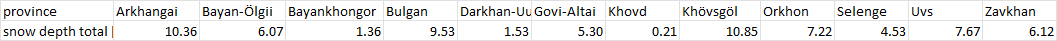
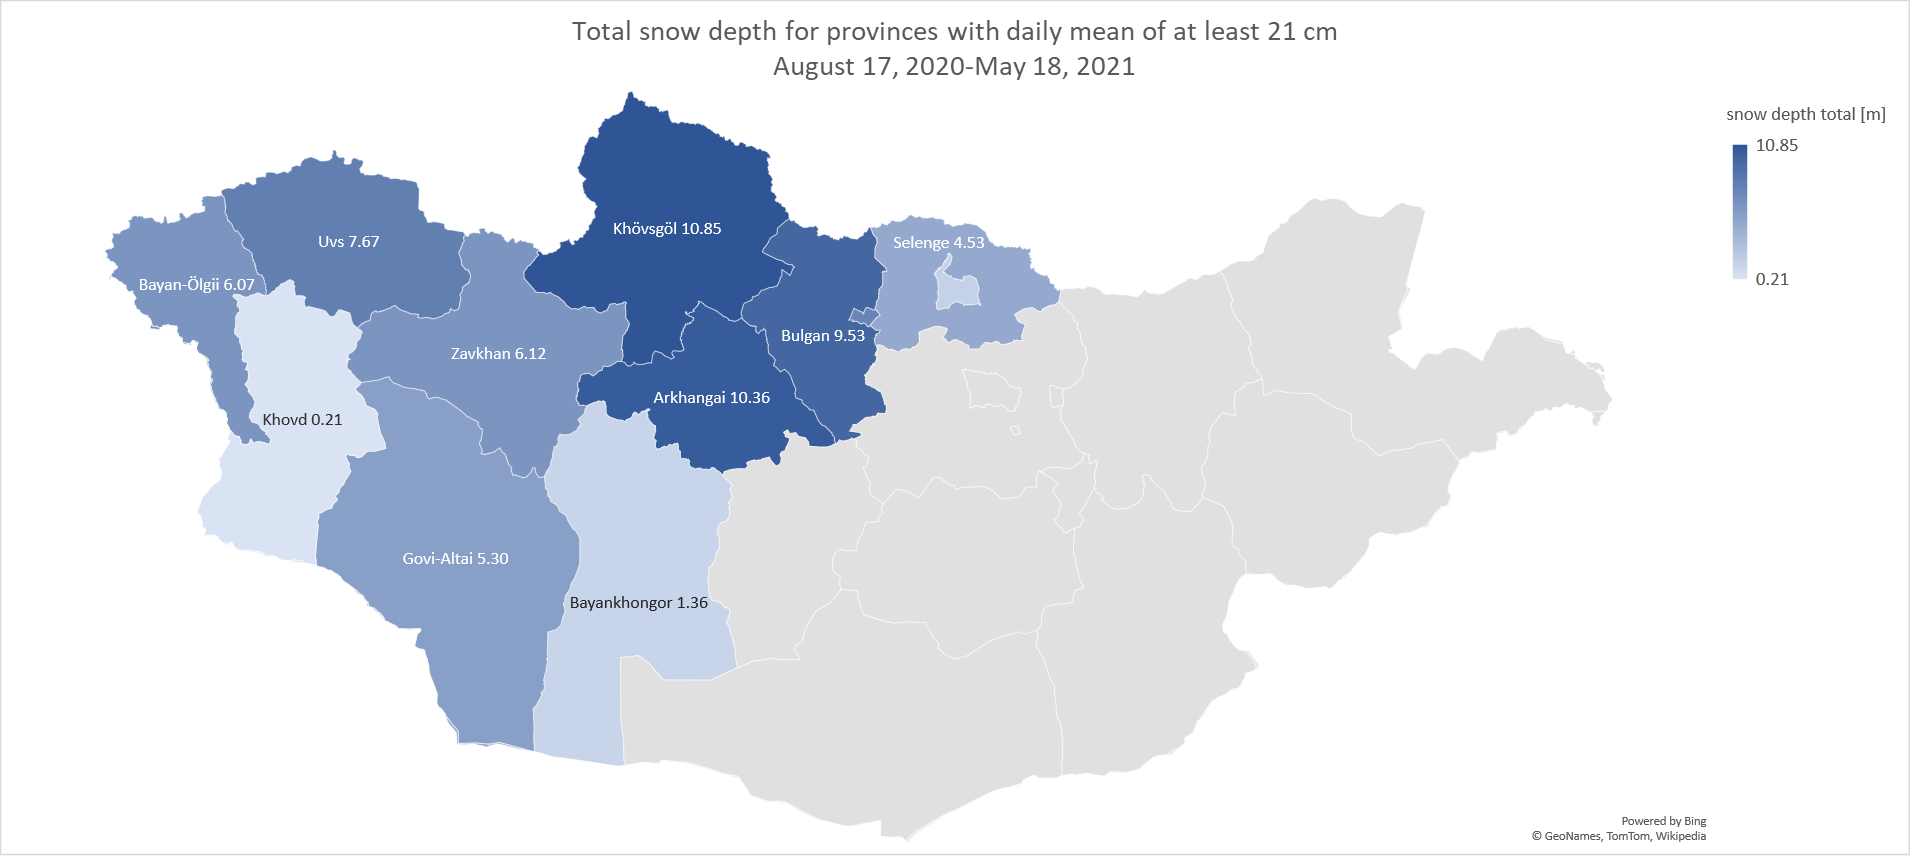